## Week 4, Lab 1: Predicting Left-Handedness from Psychological Factors
> Author: Matt Brems

We can sketch out the data science process as follows:
1. Define the problem.
2. Obtain the data.
3. Explore the data.
4. Model the data.
5. Evaluate the model.
6. Answer the problem.

We'll walk through a full data science problem in this lab. 

---
## Step 1: Define The Problem.

You're currently a data scientist working at a university. A professor of psychology is attempting to study the relationship between personalities and left-handedness. They have tasked you with gathering evidence so that they may publish.

Specifically, the professor says "I need to prove that left-handedness is caused by some personality trait. Go find that personality trait and the data to back it up."

As a data scientist, you know that any real data science problem must be **specific** and **conclusively answerable**. For example:
- Bad data science problem: "What is the link between obesity and blood pressure?"
    - This is vague and is not conclusively answerable. That is, two people might look at the conclusion and one may say "Sure, the problem has been answered!" and the other may say "The problem has not yet been answered."
- Good data science problem: "Does an association exist between obesity and blood pressure?"
    - This is more specific and is conclusively answerable. The problem specifically is asking for a "Yes" or "No" answer. Based on that, two independent people should both be able to say either "Yes, the problem has been answered" or "No, the problem has not yet been answered."
- Excellent data science problem: "As obesity increases, how does blood pressure change?"
    - This is very specific and is conclusively answerable. The problem specifically seeks to understand the effect of one variable on the other.

### 1. In the context of the left-handedness and personality example, what are three specific and conclusively answerable problems that you could answer using data science? 

> You might find it helpful to check out the codebook in the repo for some inspiration.

Answer: Does people prefer using left hand tend to play more video games? 

---
## Step 2: Obtain the data.

### 2. Read in the file titled "data.csv."
> Hint: Despite being saved as a .csv file, you won't be able to simply `pd.read_csv()` this data!

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import confusion_matrix,accuracy_score

In [4]:
df = pd.read_csv('./data.csv', sep='\t')
df.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
0,4,1,5,1,5,1,5,1,4,1,...,US,2,1,22,3,1,1,3,2,3
1,1,5,1,4,2,5,5,4,1,5,...,CA,2,1,14,1,2,2,6,1,1
2,1,2,1,1,5,4,3,2,1,4,...,NL,2,2,30,4,1,1,1,1,2
3,1,4,1,5,1,4,5,4,3,5,...,US,2,1,18,2,2,5,3,2,2
4,5,1,5,1,5,1,5,1,3,1,...,US,2,1,22,3,1,1,3,2,3


### 3. Suppose that, instead of us giving you this data in a file, you were actually conducting a survey to gather this data yourself. From an ethics/privacy point of view, what are three things you might consider when attempting to gather this data?
> When working with sensitive data like sexual orientation or gender identity, we need to consider how this data could be used if it fell into the wrong hands!

Answer: Allow the respondents to participate anonymously.


---
## Step 3: Explore the data.

### 4. Conduct exploratory data analysis on this dataset.
> If you haven't already, be sure to check out the codebook in the repo, as that will help in your EDA process.

In [6]:
df.isnull().sum().sort_values()

Q1             0
Q31            0
Q32            0
Q33            0
Q34            0
Q35            0
Q36            0
Q37            0
Q38            0
Q39            0
Q40            0
Q41            0
Q30            0
Q42            0
Q44            0
introelapse    0
testelapse     0
country        0
fromgoogle     0
engnat         0
age            0
education      0
gender         0
orientation    0
race           0
Q43            0
Q29            0
Q28            0
Q27            0
Q2             0
Q3             0
Q4             0
Q5             0
Q6             0
Q7             0
Q8             0
Q9             0
Q10            0
Q11            0
Q12            0
Q13            0
Q14            0
Q15            0
Q16            0
Q17            0
Q18            0
Q19            0
Q20            0
Q21            0
Q22            0
Q23            0
Q24            0
Q25            0
Q26            0
religion       0
hand           0
dtype: int64

In [7]:
df.describe()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
count,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,...,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000,4184.000000
mean,1.962715,3.829589,2.846558,3.186902,2.865440,3.672084,3.216539,3.184512,2.761233,3.522945,...,479.994503,1.576243,1.239962,30.370698,2.317878,1.654398,1.833413,5.013623,2.394359,1.190966
std,1.360291,1.551683,1.664804,1.476879,1.545798,1.342238,1.490733,1.387382,1.511805,1.242890,...,3142.178542,0.494212,0.440882,367.201726,0.874264,0.640915,1.303454,1.970996,2.184164,0.495357
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,7.000000,1.000000,0.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,3.000000,1.000000,2.000000,1.000000,3.000000,2.000000,2.000000,1.000000,3.000000,...,186.000000,1.000000,1.000000,18.000000,2.000000,1.000000,1.000000,5.000000,1.000000,1.000000
50%,1.000000,5.000000,3.000000,3.000000,3.000000,4.000000,3.000000,3.000000,3.000000,4.000000,...,242.000000,2.000000,1.000000,21.000000,2.000000,2.000000,1.000000,6.000000,2.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,4.000000,4.000000,5.000000,...,324.250000,2.000000,1.000000,27.000000,3.000000,2.000000,2.000000,6.000000,2.000000,1.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,119834.000000,2.000000,2.000000,23763.000000,4.000000,3.000000,5.000000,7.000000,7.000000,3.000000


In [8]:
df[(df['age'] == 23763)]

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,country,fromgoogle,engnat,age,education,gender,orientation,race,religion,hand
2690,2,5,5,1,5,5,5,5,4,2,...,US,2,2,23763,4,1,2,7,7,0


---
## Step 4: Model the data.

### 5. Suppose I wanted to use Q1 - Q44 to predict whether or not the person is left-handed. Would this be a classification or regression problem? Why?

Answer: This is a classification problem because we are trying to determine someone's class (left or right-handed). The dependent variable, whether or not someone is left-handed, is categorical and unordered.

### 6. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed based on their responses to Q1 - Q44. Before doing that, however, you remember that it is often a good idea to standardize your variables. In general, why would we standardize our variables? Give an example of when we would standardize our variables.

Answer: We would standardize our variables to be certain that they are being weighed on a similar scale. This is to ensure a certain feature, or variable, does not have undue influence on a model solely based on the matter in which it is measured.

### 7. Give an example of when we might not standardize our variables.

Answer: Logistic regressions and tree-based algorithms such as decision trees, random forests and gradient boosting are not sensitive to the magnitude of variables. So standardization is not needed before fitting these kinds of models.

### 8. Based on your answers to 6 and 7, do you think we should standardize our predictor variables in this case? Why or why not?

Answer:  Need. Because KNN is based on the distance which should be in the same scale.

### 9. We want to use $k$-nearest neighbors to predict whether or not a person is left-handed. What munging/cleaning do we need to do to our $y$ variable in order to explicitly answer this question? Do it.

Answer: 

In [9]:
df['hand'].value_counts()

1    3542
2     452
3     179
0      11
Name: hand, dtype: int64

In [11]:
df = df[df.hand != 0]
df['hand'].value_counts()

1    3542
2     452
3     179
Name: hand, dtype: int64

### 10. The professor for whom you work suggests that you set $k = 4$. In this specific case, why might this be a bad idea?

Answer: Setting k = 4 could a bad idea in this specific case because the data set contains more than 4000 responses, and k = 4 could be too few. If k is set too small, there is a risk of overfitting the model.

### 11. Let's *(finally)* use $k$-nearest neighbors to predict whether or not a person is left-handed!

> Be sure to create a train/test split with your data!

> Create four separate models, one with $k = 3$, one with $k = 5$, one with $k = 15$, and one with $k = 25$.

> Instantiate and fit your models.

In [19]:
df.columns

Index(['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9', 'Q10', 'Q11',
       'Q12', 'Q13', 'Q14', 'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20', 'Q21',
       'Q22', 'Q23', 'Q24', 'Q25', 'Q26', 'Q27', 'Q28', 'Q29', 'Q30', 'Q31',
       'Q32', 'Q33', 'Q34', 'Q35', 'Q36', 'Q37', 'Q38', 'Q39', 'Q40', 'Q41',
       'Q42', 'Q43', 'Q44', 'introelapse', 'testelapse', 'country',
       'fromgoogle', 'engnat', 'age', 'education', 'gender', 'orientation',
       'race', 'religion', 'hand'],
      dtype='object')

In [23]:
features = [col for col in df.columns if col!='hand']
X = df[features]
y = df['hand']
X.head()

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,...,testelapse,country,fromgoogle,engnat,age,education,gender,orientation,race,religion
0,4,1,5,1,5,1,5,1,4,1,...,232,US,2,1,22,3,1,1,3,2
1,1,5,1,4,2,5,5,4,1,5,...,247,CA,2,1,14,1,2,2,6,1
2,1,2,1,1,5,4,3,2,1,4,...,6774,NL,2,2,30,4,1,1,1,1
3,1,4,1,5,1,4,5,4,3,5,...,1072,US,2,1,18,2,2,5,3,2
4,5,1,5,1,5,1,5,1,3,1,...,226,US,2,1,22,3,1,1,3,2


In [24]:
y.value_counts(normalize=True)

1    0.848790
2    0.108315
3    0.042895
Name: hand, dtype: float64

In [124]:
y_train.value_counts(normalize=True)

1    0.848833
2    0.108341
3    0.042825
Name: hand, dtype: float64

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 25, stratify = y)

In [37]:
numeric_features = X_train._get_numeric_data().columns.tolist()
#numeric_features


In [41]:
preprocessor = ColumnTransformer( transformers=[
    ('num', StandardScaler(), numeric_features), ])

In [42]:
pipe = Pipeline([
    ('std', preprocessor),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('knn', KNeighborsClassifier())
])

pipe.fit(X_train, y_train)

Pipeline(steps=[('std',
                 ColumnTransformer(transformers=[('num', StandardScaler(),
                                                  ['Q1', 'Q2', 'Q3', 'Q4', 'Q5',
                                                   'Q6', 'Q7', 'Q8', 'Q9',
                                                   'Q10', 'Q11', 'Q12', 'Q13',
                                                   'Q14', 'Q15', 'Q16', 'Q17',
                                                   'Q18', 'Q19', 'Q20', 'Q21',
                                                   'Q22', 'Q23', 'Q24', 'Q25',
                                                   'Q26', 'Q27', 'Q28', 'Q29',
                                                   'Q30', ...])])),
                ('onehot', OneHotEncoder(handle_unknown='ignore')),
                ('knn', KNeighborsClassifier())])

In [43]:
pipe.score(X_test, y_test)

0.8295019157088123

In [44]:
pipe.get_params()

{'memory': None,
 'steps': [('std',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
                                     'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                                     'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
                                     'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                                     'Q27', 'Q28', 'Q29', 'Q30', ...])])),
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
  ('knn', KNeighborsClassifier())],
 'verbose': False,
 'std': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
                                   'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                                   'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
                                   'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                   

In [50]:
pipe_2 = Pipeline([
    ('std', preprocessor),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('knn', KNeighborsClassifier())
])

pipe_2_params = {'std__num__with_mean': [True, False], 
                 'std__num__with_std': [True, False],
                 'knn__p': [1, 2], 
                 'knn__weights': ['uniform', 'distance'],
                 'knn__n_neighbors': range(1, 51, 5)}

pipe_2_gridsearch = GridSearchCV(pipe_2, # What is the model we want to fit?
                                 pipe_2_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=2)

pipe_2_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 160 candidates, totalling 800 fits
[CV] END knn__n_neighbors=1, knn__p=1, knn__weights=uniform, std__num__with_mean=True, std__num__with_std=True; total time=   0.2s
[CV] END knn__n_neighbors=1, knn__p=1, knn__weights=uniform, std__num__with_mean=True, std__num__with_std=True; total time=   0.1s
[CV] END knn__n_neighbors=1, knn__p=1, knn__weights=uniform, std__num__with_mean=True, std__num__with_std=True; total time=   0.1s
[CV] END knn__n_neighbors=1, knn__p=1, knn__weights=uniform, std__num__with_mean=True, std__num__with_std=True; total time=   0.2s
[CV] END knn__n_neighbors=1, knn__p=1, knn__weights=uniform, std__num__with_mean=True, std__num__with_std=True; total time=   0.2s
[CV] END knn__n_neighbors=1, knn__p=1, knn__weights=uniform, std__num__with_mean=True, std__num__with_std=False; total time=   0.1s
[CV] END knn__n_neighbors=1, knn__p=1, knn__weights=uniform, std__num__with_mean=True, std__num__with_std=False; total time=   0.1s
[CV] END knn__n_ne

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('std',
                                        ColumnTransformer(transformers=[('num',
                                                                         StandardScaler(),
                                                                         ['Q1',
                                                                          'Q2',
                                                                          'Q3',
                                                                          'Q4',
                                                                          'Q5',
                                                                          'Q6',
                                                                          'Q7',
                                                                          'Q8',
                                                                          'Q9',
                                           

In [51]:
pipe_2_gridsearch.best_score_

0.8488337380191693

In [52]:
# Print out the set of hyperparameters that achieved the best score.
pipe_2_gridsearch.best_params_

{'knn__n_neighbors': 16,
 'knn__p': 1,
 'knn__weights': 'uniform',
 'std__num__with_mean': True,
 'std__num__with_std': True}

In [54]:
# Evaluate the best fit model on the test data.
pipe_2_gridsearch.score(X_test, y_test)

0.8486590038314177

Being good data scientists, we know that we might not run just one type of model. We might run many different models and see which is best.

### 12. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, let's check the [documentation for logistic regression in sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html). Is there default regularization? If so, what is it? If not, how do you know?

Answer:  Yes, there is default regularization - it is Ridge regression regularization. (L2)

### 13. We want to use logistic regression to predict whether or not a person is left-handed. Before we do that, should we standardize our features?

Answer: Standardization isn't required for logistic regression. But it's required when need to use regularization

### 14. Let's use logistic regression to predict whether or not the person is left-handed.


> Be sure to use the same train/test split with your data as with your $k$-NN model above!

> Create four separate models, one with LASSO and $\alpha = 1$, one with LASSO and $\alpha = 10$, one with Ridge and $\alpha = 1$, and one with Ridge and $\alpha = 10$. *(Hint: Be careful with how you specify $\alpha$ in your model!)*

> Instantiate and fit your models.

## L1 or L2 and alpha = 1 or 10 (C=1 or 1/10)

In [137]:
logreg = LogisticRegression()

pipe_0 = Pipeline([
    ('std', preprocessor),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('lg', logreg)
])

In [141]:
pipe_0_params = {'lg__C': [1, 1/10],
                 'lg__penalty': ['l1', 'l2'],
                 'lg__solver': ['liblinear','lbfgs']}

pipe_0_gridsearch = GridSearchCV(pipe_0, # What is the model we want to fit?
                                 pipe_0_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1,
                                 scoring='f1_weighted',
                                 return_train_score=True)

pipe_0_gridsearch.fit(X_train, y_train)
pipe_0_gridsearch.score(X_train, y_train)

Fitting 5 folds for each of 8 candidates, totalling 40 fits


/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/zhangzhexu/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.

0.8088922127531855

In [130]:
pd.DataFrame(pipe_0_gridsearch.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_lg__C,param_lg__penalty,param_lg__solver,params,split0_test_score,split1_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.266565,0.089329,0.007031,0.001001,1,l1,liblinear,"{'lg__C': 1, 'lg__penalty': 'l1', 'lg__solver'...",0.757188,0.742812,...,0.756476,0.009007,3,0.888933,0.886936,0.896524,0.900120,0.894169,0.893336,0.004842
1,0.016517,0.000104,0.000000,0.000000,1,l1,lbfgs,"{'lg__C': 1, 'lg__penalty': 'l1', 'lg__solver'...",NaN,NaN,...,NaN,NaN,7,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.079109,0.002893,0.006290,0.000075,1,l2,liblinear,"{'lg__C': 1, 'lg__penalty': 'l2', 'lg__solver'...",0.738019,0.738019,...,0.740815,0.005683,4,0.898122,0.900919,0.897723,0.904515,0.898962,0.900048,0.002490
3,0.207551,0.003960,0.006871,0.000370,1,l2,lbfgs,"{'lg__C': 1, 'lg__penalty': 'l2', 'lg__solver'...",0.621406,0.637380,...,0.629277,0.009273,5,0.815421,0.840192,0.815821,0.821015,0.833466,0.825183,0.009942
4,0.043435,0.009609,0.006390,0.000120,0.1,l1,liblinear,"{'lg__C': 0.1, 'lg__penalty': 'l1', 'lg__solve...",0.833866,0.813099,...,0.826782,0.007597,1,0.845785,0.845785,0.846185,0.844586,0.844649,0.845398,0.000654
5,0.016530,0.000216,0.000000,0.000000,0.1,l1,lbfgs,"{'lg__C': 0.1, 'lg__penalty': 'l1', 'lg__solve...",NaN,NaN,...,NaN,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.046565,0.002957,0.006228,0.000067,0.1,l2,liblinear,"{'lg__C': 0.1, 'lg__penalty': 'l2', 'lg__solve...",0.784345,0.765176,...,0.775327,0.006464,2,0.852177,0.854175,0.857771,0.846185,0.848243,0.851710,0.004137
7,0.204462,0.001355,0.006429,0.000173,0.1,l2,lbfgs,"{'lg__C': 0.1, 'lg__penalty': 'l2', 'lg__solve...",0.560703,0.567093,...,0.567281,0.011988,6,0.675190,0.705953,0.681582,0.690372,0.687700,0.688159,0.010327


In [131]:
pipe_0_gridsearch.best_estimator_.named_steps["lg"].coef_

array([[ 0.        ,  0.05852093,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        , -0.1323805 , ...,  0.        ,
         0.        , -0.05649757],
       [ 0.        , -0.53220899, -0.6270402 , ...,  0.        ,
         0.        ,  0.        ]])

In [142]:
#pipe_0.named_steps['onehot'].get_feature_names_out(X)

In [132]:
pipe_0_gridsearch.best_score_

0.8267818530351437

In [133]:
pipe_0.get_params()

{'memory': None,
 'steps': [('std',
   ColumnTransformer(transformers=[('num', StandardScaler(),
                                    ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
                                     'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                                     'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
                                     'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',
                                     'Q27', 'Q28', 'Q29', 'Q30', ...])])),
  ('onehot', OneHotEncoder(handle_unknown='ignore')),
  ('lg', LogisticRegression(class_weight='balanced'))],
 'verbose': False,
 'std': ColumnTransformer(transformers=[('num', StandardScaler(),
                                  ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7',
                                   'Q8', 'Q9', 'Q10', 'Q11', 'Q12', 'Q13', 'Q14',
                                   'Q15', 'Q16', 'Q17', 'Q18', 'Q19', 'Q20',
                                   'Q21', 'Q22', 'Q23', 'Q24', 'Q25', 'Q26',

In [65]:
"""
logreg = LogisticRegression(penalty='l1', solver='liblinear')

pipe_3 = Pipeline([
    ('std', preprocessor),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('lg', logreg)
])

pipe_3.get_params()

pipe_3_params = {'lg__C': [1, 1/10]}

pipe_3_gridsearch = GridSearchCV(pipe_3, # What is the model we want to fit?
                                 pipe_3_params, # What is the dictionary of hyperparameters?
                                 cv=5, # What number of folds in CV will we use?
                                 verbose=1)

pipe_3_gridsearch.fit(X_train, y_train)
pipe_3_gridsearch.score(X_train, y_train)
pipe_3_gridsearch.best_score_
pipe_3_gridsearch.best_params_

"""

In [73]:
"""ridge = LogisticRegression(penalty='l2')

pipe_4 = Pipeline([
    ('std', preprocessor),
    ('onehot', OneHotEncoder(handle_unknown='ignore')),
    ('rd', ridge)
])
"""

---
## Step 5: Evaluate the model(s).

### 15. Before calculating any score on your data, take a step back. Think about your $X$ variable and your $Y$ variable. Do you think your $X$ variables will do a good job of predicting your $Y$ variable? Why or why not? What impact do you think this will have on your scores?

Answer:

### 16. Using accuracy as your metric, evaluate all eight of your models on both the training and testing sets. Put your scores below. (If you want to be fancy and generate a table in Markdown, there's a [Markdown table generator site linked here](https://www.tablesgenerator.com/markdown_tables#).)
- Note: Your answers here might look a little weird. You didn't do anything wrong; that's to be expected!

Answer:

In [134]:
y_pred=pipe_0_gridsearch.predict(X_test)
accuracy_score(y_test, y_pred)

0.8132183908045977

In [135]:
y_train.value_counts(normalize=True)

1    0.848833
2    0.108341
3    0.042825
Name: hand, dtype: float64

[[3420   14  108]
 [ 416   15   21]
 [ 133    1   45]]


<AxesSubplot:>

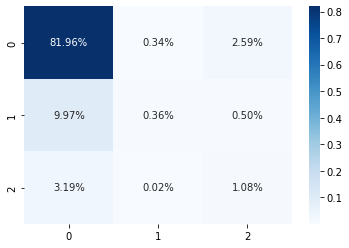

In [136]:
y_pred = pipe_0_gridsearch.predict(X)
#Get the confusion matrix
cf_matrix = confusion_matrix(y, y_pred)
print(cf_matrix)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True, 
            fmt='.2%', cmap='Blues')

### 17. In which of your $k$-NN models is there evidence of overfitting? How do you know?

Answer:

### 18. Broadly speaking, how does the value of $k$ in $k$-NN affect the bias-variance tradeoff? (i.e. As $k$ increases, how are bias and variance affected?)

Answer:

### 19. If you have a $k$-NN model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

### 20. In which of your logistic regression models is there evidence of overfitting? How do you know?

Answer: pipe_0_gridsearch.best_score_ vs pipe_0_gridsearch.score(X_train, y_train)

In [102]:
pipe_0_gridsearch.best_score_

0.8488337380191693

In [103]:
pipe_0_gridsearch.score(X_train, y_train)

0.8488334931287952

In [104]:
pipe_0_gridsearch.best_score_ - (pipe_0_gridsearch.score(X_train, y_train))

2.448903740903674e-07

test average score is higher than train data score, which means that there is no overfitting

### 21. Broadly speaking, how does the value of $C$ in logistic regression affect the bias-variance tradeoff? (i.e. As $C$ increases, how are bias and variance affected?)

Answer:

### 22. For your logistic regression models, play around with the regularization hyperparameter, $C$. As you vary $C$, what happens to the fit and coefficients in the model? What do you think this means in the context of this specific problem?

Answer:

### 23. If you have a logistic regression model that has evidence of overfitting, what are three things you might try to do to combat overfitting?

Answer:

---
## Step 6: Answer the problem.

### 24. Suppose you want to understand which psychological features are most important in determining left-handedness. Would you rather use $k$-NN or logistic regression? Why?

Answer:

### 25. Select your logistic regression model that utilized LASSO regularization with $\alpha = 1$. Interpret the coefficient for `Q1`.

Answer:

### 26. If you have to select one model overall to be your *best* model, which model would you select? Why?
- Usually in the "real world," you'll fit many types of models but ultimately need to pick only one! (For example, a client may not understand what it means to have multiple models, or if you're using an algorithm to make a decision, it's probably pretty challenging to use two or more algorithms simultaneously.) It's not always an easy choice, but you'll have to make it soon enough. Pick a model and defend why you picked this model!

Answer:

### 27. Circle back to the three specific and conclusively answerable questions you came up with in Q1. Answer one of these for the professor based on the model you selected!

Answer:

### BONUS:
Looking for more to do? Probably not - you're busy! But if you want to, consider exploring the following. (They could make for a blog post!)
- Create a visual plot comparing training and test metrics for various values of $k$ and various regularization schemes in logistic regression.
- Rather than just evaluating models based on accuracy, consider using sensitivity, specificity, etc.
- In the context of predicting left-handedness, why are unbalanced classes concerning? If you were to re-do this process given those concerns, what changes might you make?
- Fit and evaluate a generalized linear model other than logistic regression (e.g. Poisson regression).
- Suppose this data were in a `SQL` database named `data` and a table named `inventory`. What `SQL` query would return the count of people who were right-handed, left-handed, both, or missing with their class labels of 1, 2, 3, and 0, respectively? (You can assume you've already logged into the database.)